# Preprosess, split, and analyze raw data for data pipeline

## 1. Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## 2. Load annotated minutes

In [2]:
import_path = "/Users/bernhardbrunner/Desktop/masters_thesis/data/annotated_minutes.csv"

In [3]:
annotated_minutes = pd.read_csv(import_path, encoding="latin-1")

In [4]:
annotated_minutes["stratify_column"] = annotated_minutes["Country"] + "_" + annotated_minutes["Monetary policy stance"]

In [5]:
annotated_minutes.head()

,Monetary policy stance,Sentence,Central bank,Country,stratify_column
0,dovish,It was also said that current inflation was be...,Czech National Bank,Czechia,Czechia_dovish
1,dovish,According the new forecast a modest slowdown i...,Czech National Bank,Czechia,Czechia_dovish
2,dovish,Compared to the previous macroeconomic forecas...,Czech National Bank,Czechia,Czechia_dovish
3,dovish,Opinions were also expressed that a future rat...,Czech National Bank,Czechia,Czechia_dovish
4,dovish,Compared to the previous macroeconomic forecas...,Czech National Bank,Czechia,Czechia_dovish


## 3. Split data into train, dev, and test sets

In [6]:
# Split data into train and test set.
train_dev, test = train_test_split(
        annotated_minutes, test_size=0.1, random_state=17, stratify=annotated_minutes["stratify_column"]
)

In [7]:
# Split train_dev set into train and dev.
train, dev = train_test_split(
        train_dev, test_size=0.1, random_state=17, stratify=train_dev["stratify_column"]
)

In [8]:
print(f"Train shape: {train.shape}")
print(f"Dev shape: {dev.shape}")
print(f"Test shape: {test.shape}")

Train shape: (1618, 5)
Dev shape: (180, 5)
Test shape: (200, 5)


## 4. Plot the distribution of labels and central banks for train, dev, and test sets

In [9]:
def combined_barplot(df1, df2, df3, column, title):
    # Count values in df1, df2, df3
    labels_count1 = df1[column].value_counts()
    labels_count2 = df2[column].value_counts()
    labels_count3 = df3[column].value_counts()

    # Prepare x locations for the bar plots
    x = np.arange(len(labels_count1))
    bar_width = 0.25

    # Create the bar plot
    plt.figure(figsize=(10, 6))

    plt.bar(x - bar_width, labels_count1, width=bar_width, label='Train set', color='orange', alpha=0.7)
    plt.bar(x, labels_count2, width=bar_width, label='Dev set', color='blue', alpha=0.7)
    plt.bar(x + bar_width, labels_count3, width=bar_width, label='Test set', color='green', alpha=0.7)

    plt.title(title)
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(x, labels_count1.index, rotation=0)  # Set x-ticks to the labels of the first dataset
    plt.legend()
    plt.tight_layout()
    plt.show()

### Distribution of labels

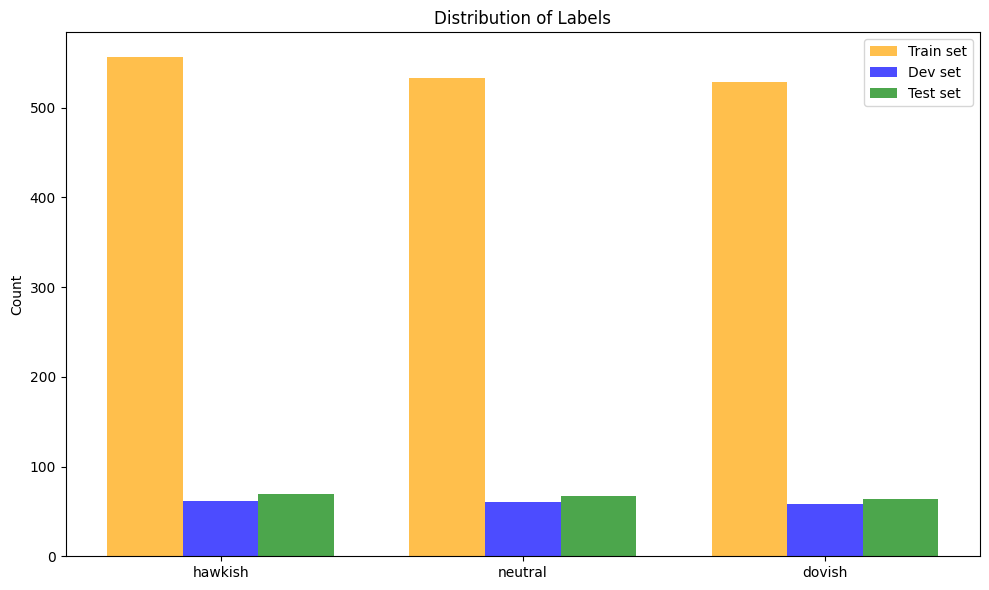

In [10]:
combined_barplot(train, dev, test, "Monetary policy stance", "Distribution of Labels")

### Distribution of central banks

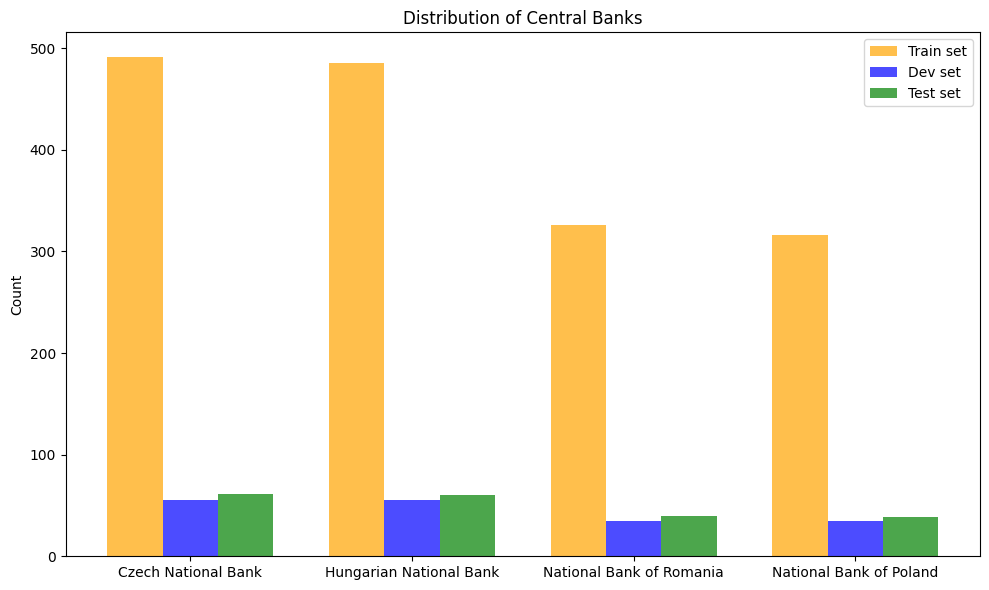

In [11]:
combined_barplot(train, dev, test, "Central bank", "Distribution of Central Banks")

## 5. Export annotated sentences of train, dev, and test sets as TSV

In [12]:
# Drop all columns except 
train_final = train.drop(labels=["Central bank", "Country", "stratify_column"], axis=1)
dev_final = dev.drop(labels=["Central bank", "Country", "stratify_column"], axis=1)
test_final = test.drop(labels=["Central bank", "Country", "stratify_column"], axis=1)

In [13]:
export_path = "/Users/bernhardbrunner/Desktop/masters_thesis/data/" 

In [14]:
train_final.to_csv(export_path + "train.tsv", sep="\t", index=False, header=False)
dev_final.to_csv(export_path + "dev.tsv", sep="\t", index=False, header=False)
test_final.to_csv(export_path + "test.tsv", sep="\t", index=False, header=False)